In [1]:
##find p 1
#theta = (pの式)を満たすpを求める
#粒子によらず
import numpy as np
from scipy.optimize import fsolve


# x = [3.41, 12.95, 5.68, 1.59, 7.27, 6.82, 10.68, 8.86, 5.91, 15.23, 10.68, 10.00, 11.82, 10.91]
# theta = [0.59, 0.19, 0.84, 1.01, 0.59, 0.96, 0.30, 1.12, 0.21, 0.12, 0.23, 0.002, 0.07, 0.09, 0.10]

# p = 運動量 [MeV/c]
beta = 1.0
z = 1.0
x = 3.41 #測定値
theta = 0.59 #測定値
X0 = 30050



def f(p):
    return 13.6/ p * z * np.sqrt(x/X0) * (1.0 + 0.038*np.log(x*z*z/(X0*beta*beta))) - theta


initial_guess = 0.1
p_ans = fsolve(f, initial_guess)

print("p:", p_ans[0], "[MeV/c]")
#gamma = 1/np.sqrt(1-beta_ans[0]*beta_ans[0])
#print("kinetic energy:", mc2*(gamma - 1))
#print("total energy:", gamma*mc2)

p: 0.16078969177152172 [MeV/c]


p 1 : 0.16078969177152172 [MeV/c]
p 2 : 1.04834963740421 [MeV/c]
p 3 : 0.15007236567758275 [MeV/c]
p 4 : 0.061297419794040686 [MeV/c]
p 5 : 0.2450872619009077 [MeV/c]
p 6 : 0.1453721242666081 [MeV/c]
p 7 : 0.44747861677760925 [MeV/c]
p 8 : 0.1598309250056103 [MeV/c]
p 9 : 0.7685146891949272 [MeV/c]
p 10 : 1.0739619791414954 [MeV/c]
p 11 : 0.9473794419043228 [MeV/c]
p 12 : 89.50531800314093 [MeV/c]
p 13 : 2.465683661146447 [MeV/c]
p 14 : 2.104021189617728 [MeV/c]
p 15 : 1.8113773143365635 [MeV/c]


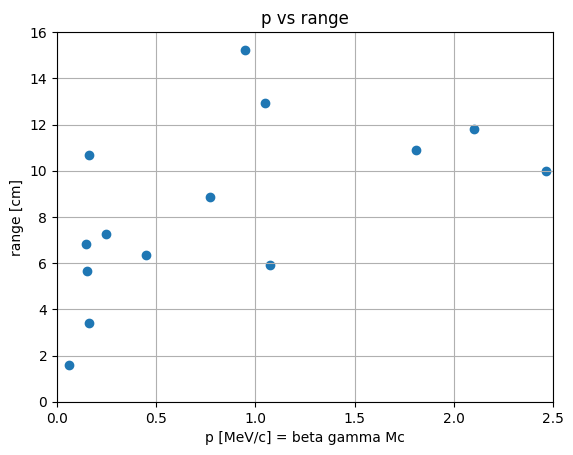

In [2]:
##find p 2
#theta = (pの式)を満たすpを求める
#粒子によらず
import numpy as np
from scipy.optimize import fsolve


x_list = [3.41, 12.95, 5.68, 1.59, 7.27, 6.82, 6.36, 10.68, 8.86, 5.91, 15.23, 10.68, 10.00, 11.82, 10.91]
theta_list = [0.59, 0.19, 0.84, 1.01, 0.59, 0.96, 0.30, 1.12, 0.21, 0.12, 0.23, 0.002, 0.07, 0.09, 0.10]

# p = 運動量 [MeV/c]
beta = 1.0
z = 1.0
#x = 3.41 #測定値
#theta = 0.59 #測定値
X0 = 30050

def f(p):
    return 13.6/ p * z * np.sqrt(x/X0) * (1.0 + 0.038*np.log(x*z*z/(X0*beta*beta))) - theta

p_list = []

for i in range(0, 15, 1):
    x = x_list[i]
    theta = theta_list[i]
    initial_guess = 0.1 
    p_ans = fsolve(f, initial_guess)
    p_list.append(p_ans[0])
    print("p", i+1, ":", p_ans[0], "[MeV/c]")

import matplotlib.pyplot as plt
plt.scatter(p_list, x_list) 
plt.xlabel("p [MeV/c] = beta gamma Mc") 
plt.ylabel("range [cm]")
plt.title("p vs range")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
plt.xlim(0, 2.5)
plt.ylim(0, 16)
plt.grid()
plt.show()


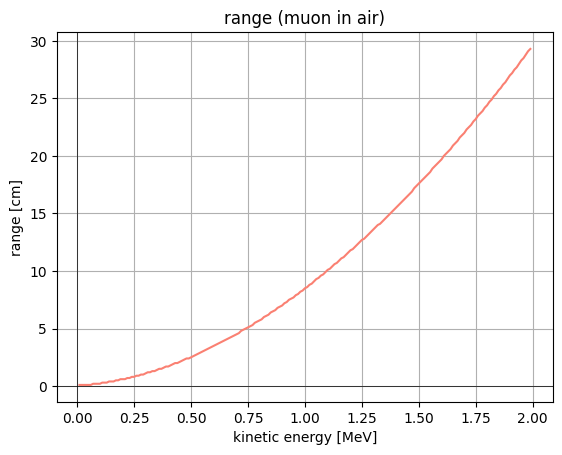

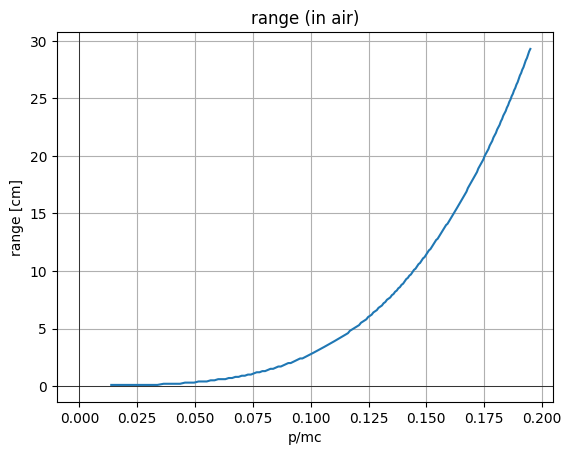

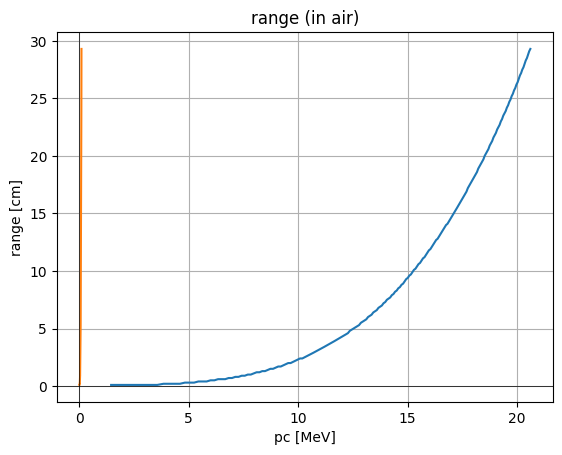

In [3]:
#-dE/dxの式はどう活用すればいいんだろう...
#-dE/dxの式から、p vs rangeの理論式を作りたい
#muonとelectronで2種類作ればいいかな？
#betaをどうしようか...

#Bethe 6
#Bethe-Blochからエネルギー損失計算
#具体的な計算用
#electron、霧箱のプリントとスケール合わせたもの
#グラフプロット用
#飛程がどれくらいか見る用

import numpy as np
import scipy.constants as const

# 物理定数
K = 0.307 #MeV cm2 /mol
z = 1 #粒子のcharge
mec2 = 0.511  # 電子の質量
Z = 14.2  #空気の平均原子番号
A = 28.8  #空気の平均質量数 (g/mol)
I = 34.0e-6  # 平均電離エネルギー (MeV)
Mc2 = 105.66 #muonの質量

N = const.Avogadro  #アボガドロ数 (/mol)
rho = 0.001293  #空気の密度 (g/cm³)

#betaの計算
def beta(Energy):
    return np.sqrt(1 - (Mc2 / (Energy))**2)

#BetheBlochに密度をかけたもの
def bethe2(Energy):
    b = beta(Energy)
    term1 = K*z*z*Z/A/b/b
    term2 = 2*mec2*b*b/((1-b*b)*I*I)
    term3 = (2*mec2*b*b)/((1-b*b)*(1 + 2*mec2/Mc2/np.sqrt(1-b*b) + (mec2/Mc2)**2))
    #print(f"log argument: {term2 * term3}")
    return term1 * (1/2 * np.log( term2*term3 ) - b*b) * rho

##########################################################################

# 数値積分でエネルギー損失を求める
def stop(Energy):
    x = 0
    dx = 0.1
    for i in range(1000000):
        x += dx
        de = bethe2(Energy) * dx
        Energy -= de
        if Energy <= Mc2+0.002: #ここに0.001とか追加すると変なピークが消える
            break
    return x

x_energy = [] 
x_p_mc = [] #beta gamma = p/mc 
x_muon = []
x_ele =[]
y_length = []

#0.01~1MeVまで0.01刻みで
for i in range(1, 200, 1):
    xi = i/100
    Beta = beta(xi+105.66)
    gamma = 1/np.sqrt(1-Beta*Beta)
    pmci = Beta*gamma
    x_energy.append(xi)
    x_p_mc.append(pmci)
    x_muon.append(pmci * 105.66)
    x_ele.append(pmci * 0.511)
    y_length.append(stop(xi+105.66))

import matplotlib.pyplot as plt
plt.plot(x_energy, y_length, color = "salmon") 
plt.xlabel("kinetic energy [MeV]") 
plt.ylabel("range [cm]")
plt.title("range (muon in air)")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
#plt.xlim(0.01, 100)
#plt.ylim(0.01, 250)
#plt.xscale('log')
#plt.yscale('log')
plt.grid() 
plt.show()


plt.plot(x_p_mc, y_length)#, color = "salmon") 
plt.xlabel("p/mc") 
plt.ylabel("range [cm]")
plt.title("range (in air)")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
#plt.xlim(0.01, 100)
#plt.ylim(0.01, 250)
#plt.xscale('log')
#plt.yscale('log')
plt.grid() 
plt.show()


plt.plot(x_muon, y_length)#, color = "salmon") 
plt.plot(x_ele, y_length)
plt.xlabel("pc [MeV]")
plt.ylabel("range [cm]")
plt.title("range (in air)")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
#plt.xlim(0, 2.5)
#plt.ylim(0, 16)
#plt.xscale('log')
#plt.yscale('log')
plt.grid() 
plt.show()

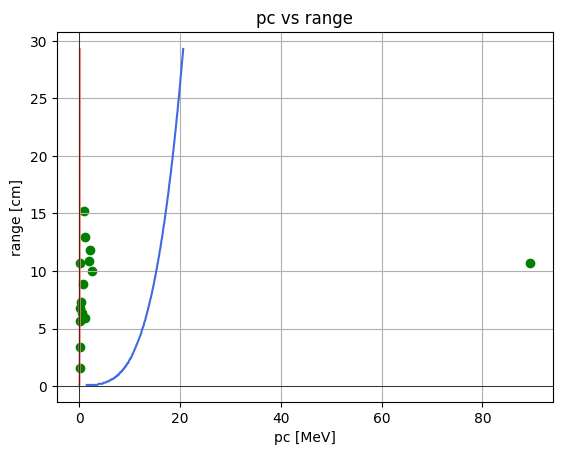

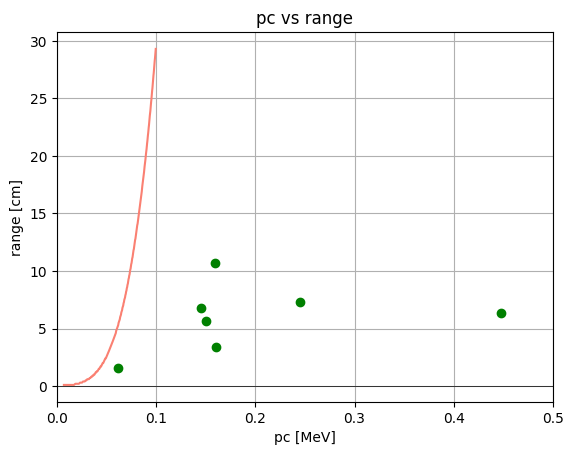

In [2]:
#scatterとplotの横軸合わせたやつを作って、
#横軸合わせるときに使う質量で2通りscatterを作って、
#どっちがpltに近いかで、電子or muonの比較ができる？
#あとは、エネルギーと飛程がどれくらい合っているかが見れる？
#軸の変え方がよくわかんない
##find p 2
#theta = (pの式)を満たすpを求める
#粒子によらず
import numpy as np
from scipy.optimize import fsolve


x_list = [3.41, 12.95, 5.68, 1.59, 7.27, 6.82, 6.36, 10.68, 8.86, 5.91, 15.23, 10.68, 10.00, 11.82, 10.91]
theta_list = [0.59, 0.19, 0.84, 1.01, 0.59, 0.96, 0.30, 1.12, 0.21, 0.12, 0.23, 0.002, 0.07, 0.09, 0.10]

# p = 運動量 [MeV/c]
beta = 1.0
z = 1.0
X0 = 30050

def f(p):
    return 13.6/ p * z * np.sqrt(x/X0) * (1.0 + 0.038*np.log(x*z*z/(X0*beta*beta))) - theta

p_list = []
p_muon_list = []
p_ele_list = []

for i in range(0, 15, 1):
    x = x_list[i]
    theta = theta_list[i]
    initial_guess = 0.1 
    p_ans = fsolve(f, initial_guess)
    p_list.append(p_ans[0])
    p_muon_list.append(p_ans[0] / 105.66)
    p_ele_list.append(p_ans[0] / 0.511)
    #print("p", i+1, ":", p_ans[0], "[MeV/c]")

#################################################################

import numpy as np
import scipy.constants as const

# 物理定数
K = 0.307 #MeV cm2 /mol
z = 1 #粒子のcharge
mec2 = 0.511  # 電子の質量
Z = 14.2  #空気の平均原子番号
A = 28.8  #空気の平均質量数 (g/mol)
I = 34.0e-6  # 平均電離エネルギー (MeV)
Mc2 = 105.66 #muonの質量

N = const.Avogadro  #アボガドロ数 (/mol)
rho = 0.001293  #空気の密度 (g/cm³)

#betaの計算
def beta(Energy):
    return np.sqrt(1 - (Mc2 / (Energy))**2)

#BetheBlochに密度をかけたもの
def bethe2(Energy):
    b = beta(Energy)
    term1 = K*z*z*Z/A/b/b
    term2 = 2*mec2*b*b/((1-b*b)*I*I)
    term3 = (2*mec2*b*b)/((1-b*b)*(1 + 2*mec2/Mc2/np.sqrt(1-b*b) + (mec2/Mc2)**2))
    #print(f"log argument: {term2 * term3}")
    return term1 * (1/2 * np.log( term2*term3 ) - b*b) * rho

##########################################################################

# 数値積分でエネルギー損失を求める
def stop(Energy):
    x = 0
    dx = 0.1
    for i in range(1000000):
        x += dx
        de = bethe2(Energy) * dx
        Energy -= de
        if Energy <= Mc2+0.002: #ここに0.001とか追加すると変なピークが消える
            break
    return x

x_energy = [] 
x_p_mc = [] #beta gamma = p/mc 
x_muon = []
x_ele =[]
y_length = []

#0.01~1MeVまで0.01刻みで
for i in range(1, 200, 1):
    xi = i/100
    Beta = beta(xi+105.66)
    gamma = 1/np.sqrt(1-Beta*Beta)
    pmci = Beta*gamma
    x_energy.append(xi)
    x_p_mc.append(pmci)
    x_muon.append(pmci * 105.66)
    x_ele.append(pmci * 0.511)
    y_length.append(stop(xi+105.66))

import matplotlib.pyplot as plt
plt.scatter(p_list, x_list, color="green") 
plt.plot(x_muon, y_length, color = "royalblue") 
plt.plot(x_ele, y_length, color="salmon")
plt.xlabel("pc [MeV]")
plt.ylabel("range [cm]")
plt.title("pc vs range")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
#plt.xlim(0, 0.3)
#plt.ylim(0, 16)
#plt.xscale('log')
#plt.yscale('log')
plt.grid() 
plt.show()


plt.scatter(p_list, x_list, color="green") 
plt.plot(x_muon, y_length, color = "royalblue") 
plt.plot(x_ele, y_length, color="salmon")
plt.xlabel("pc [MeV]")
plt.ylabel("range [cm]")
plt.title("pc vs range")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
plt.xlim(0, 0.5)
#plt.ylim(0, 16)
#plt.xscale('log')
#plt.yscale('log')
plt.grid() 
plt.show()